<a href="https://colab.research.google.com/github/Vinay7115/EncryptixML_task/blob/main/SMS_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from gensim.models import Word2Vec

In [ ]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin1')

In [ ]:
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
print(df.tail())

In [ ]:
# X variable contains the text messages
X = df['v2']

# y variable contains the labels (ham or spam)
y = df['v1']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
# Fit the vectorizer to the training data and transform both the training and testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the testing data
y_pred = log_reg.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9524663677130045
Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Confusion Matrix:
[[962   3]
 [ 50 100]]


In [ ]:
# Create a Word2Vec model
word2vec_model = Word2Vec(X_train, vector_size=100, window=5, min_count=1)

In [ ]:
# Create a CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

In [ ]:
# Fit the vectorizer to the training data and transform both the training and testing data
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
# Assume word2vec_model is already trained and X_train_count, X_test_count are the count vectorizer outputs

def transform_to_word2vec(text_data, word2vec_model):
    transformed_data = []
    for text in text_data:
        # Tokenize the text
        words = text.split()
        # Filter out words that are not in the Word2Vec vocabulary
        words = [word for word in words if word in word2vec_model.wv]
        if len(words) > 0:
            # Average the word vectors to get a single vector for the text
            vector = np.mean(word2vec_model.wv[words], axis=0)
        else:
            # If no words in the text are in the Word2Vec vocabulary, use a zero vector
            vector = np.zeros(word2vec_model.vector_size)
        transformed_data.append(vector)
    return np.array(transformed_data)

# Example usage with your data
X_train_word2vec = transform_to_word2vec(X_train, word2vec_model)
X_test_word2vec = transform_to_word2vec(X_test, word2vec_model)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the Word2Vec vectors to the range [0, 1]
scaler = MinMaxScaler()
X_train_word2vec_scaled = scaler.fit_transform(X_train_word2vec)
X_test_word2vec_scaled = scaler.transform(X_test_word2vec)

# Initialize the MultinomialNB model
nb = MultinomialNB()

# Train the model
nb.fit(X_train_word2vec_scaled, y_train)

# Predict and evaluate
y_pred = nb.predict(X_test_word2vec_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8591928251121076
Classification Report:
              precision    recall  f1-score   support

         ham       0.88      0.97      0.92       965
        spam       0.42      0.13      0.19       150

    accuracy                           0.86      1115
   macro avg       0.65      0.55      0.56      1115
weighted avg       0.82      0.86      0.82      1115

Confusion Matrix:
[[939  26]
 [131  19]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the GaussianNB model
nba = GaussianNB()

# Train the model
nba.fit(X_train_word2vec, y_train)

# Predict and evaluate
y_pred_e = nb.predict(X_test_word2vec)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_e)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred_e))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_e))

Accuracy: 0.8573991031390135
Classification Report:
              precision    recall  f1-score   support

         ham       0.89      0.96      0.92       965
        spam       0.44      0.23      0.30       150

    accuracy                           0.86      1115
   macro avg       0.66      0.59      0.61      1115
weighted avg       0.83      0.86      0.84      1115

Confusion Matrix:
[[922  43]
 [116  34]]


In [ ]:
from sklearn.svm import SVC

# Train an SVM model
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred_lf = svm.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lf)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred_lf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lf))

Accuracy: 0.979372197309417
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[961   4]
 [ 19 131]]


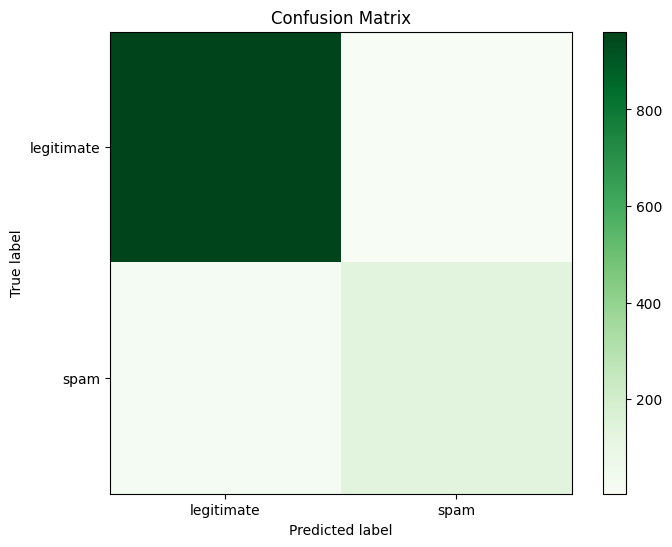

In [ ]:
import matplotlib.pyplot as plt

# Display a graph of the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(y_test, y_pred_lf), cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['legitimate', 'spam'])
plt.yticks([0, 1], ['legitimate', 'spam'])
plt.colorbar()
plt.show()